<div style="font-family: 'Segoe UI', 'Helvetica Neue', Arial, sans-serif; line-height: 1.6;">
  <h1 style="color: #4CAF50; border-bottom: 3px solid #4CAF50; padding-bottom: 10px;">
    Visualizing Air Quality Data
  </h1>

  <h2 style="color: #4CAF50;">What is Data Visualization?</h2>

  <blockquote style="border-left: 4px solid #4CAF50; padding-left: 20px; color: #555; font-style: italic;">
    Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.
  </blockquote>

  Humans process visuals faster than text, making data visualization a powerful tool for turning raw data into meaningful insights. Well-designed visuals not only enhance understanding but also tell compelling stories that drive action.

  In this notebook, we will:
  <ul>
    <li style="margin-bottom: 8px;">📊 <strong>Explore different plot types</strong> to answer specific questions about the data.</li>
    <li style="margin-bottom: 8px;">🎨 <strong>Use multiple libraries</strong> like Matplotlib, Seaborn, and Plotly to create static and interactive visualizations.</li>
    <li style="margin-bottom: 8px;">📖 <strong>Tell a story</strong> with the data, moving from broad trends to specific details.</li>
    <li style="margin-bottom: 8px;">💡 <strong>Derive actionable insights</strong> from the patterns we uncover.</li>
  </ul>

  Creating impactful visualizations not only improves data interpretation but also makes your analysis and portfolio stand out.
</div>

<h2 style="color: #4CAF50; border-bottom: 2px solid #ccc; padding-bottom: 8px;">1. Setup and Data Preparation</h2>

First, we'll set up our environment by importing the necessary libraries. For this exercise, we will work with a pre-generated sample of air quality data to focus purely on visualization techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io

# Set a consistent style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

<h3 style="color: #4CAF50;">1.1. Load and Wrangle Data</h3>
We'll load a sample dataset from a string and perform some basic cleaning: converting the 'timestamp' column to a proper datetime object and setting it as the index.

In [2]:
# Sample data representing daily air quality readings in Nairobi
data = """
timestamp,P2,P1,temperature,humidity
2023-11-01,135.2,55.1,23.5,65.2
2023-11-02,142.6,60.3,24.1,63.1
2023-11-03,128.9,51.8,22.9,68.4
2023-11-04,110.5,45.2,22.5,70.1
2023-11-05,115.1,48.9,22.8,69.5
2023-11-06,122.3,50.7,23.1,67.8
2023-11-07,133.8,54.6,23.8,64.9
2023-11-08,129.4,52.1,23.6,65.7
2023-11-09,138.7,58.3,24.5,62.3
2023-11-10,121.0,49.5,23.0,68.0
2023-11-11,105.4,43.2,22.1,71.2
2023-11-12,109.8,46.7,22.6,70.3
2023-11-13,119.5,49.1,23.3,67.1
2023-11-14,131.2,53.9,23.7,65.4
2023-11-15,145.9,62.5,25.0,61.0
"""

def wrangle(data):
    """Loads data and prepares it for visualization."""
    df = pd.read_csv(io.StringIO(data))
    # Convert 'timestamp' to datetime and set as index
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')
    # Add 'day_of_week' for categorical analysis
    df['day_of_week'] = df.index.day_name()
    return df

df = wrangle(data)
df.head()

,P2,P1,temperature,humidity,day_of_week
timestamp,,,,,
2023-11-01,135.2,55.1,23.5,65.2,Wednesday
2023-11-02,142.6,60.3,24.1,63.1,Thursday
2023-11-03,128.9,51.8,22.9,68.4,Friday
2023-11-04,110.5,45.2,22.5,70.1,Saturday
2023-11-05,115.1,48.9,22.8,69.5,Sunday


<h2 style="color: #4CAF50; border-bottom: 2px solid #ccc; padding-bottom: 8px;">2. Creating Visualizations</h2>

Now we'll create a series of plots, each designed to answer a different question about our air quality data.

<h3 style="color: #4CAF50;">2.1. Time Series: How do pollutant levels change over time?</h3>
A line plot is the most effective way to visualize time-series data. It clearly shows trends, seasonality, and anomalies over a continuous interval. Here, we use Matplotlib for a clean, publication-ready plot.

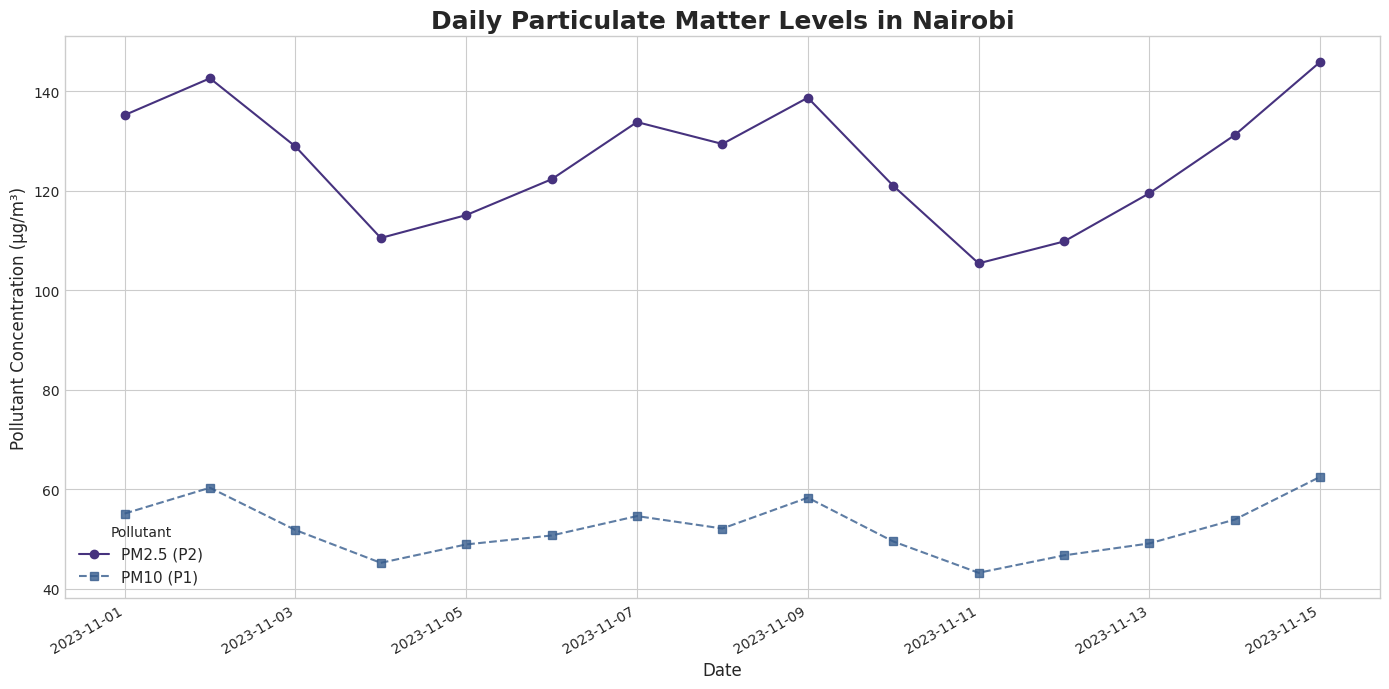

In [3]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df.index, df['P2'], marker='o', linestyle='-', label='PM2.5 (P2)')
ax.plot(df.index, df['P1'], marker='s', linestyle='--', label='PM10 (P1)', alpha=0.8)

# Formatting the plot
ax.set_title('Daily Particulate Matter Levels in Nairobi', fontsize=18, weight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Pollutant Concentration (μg/m³)', fontsize=12)
ax.legend(title='Pollutant', fontsize=11)
fig.autofmt_xdate()  # Improve date formatting

plt.tight_layout()
plt.show()


<h3 style="color: #4CAF50;">2.2. Distribution: What is the spread of PM2.5 readings?</h3>
A histogram combined with a Kernel Density Estimate (KDE) plot helps us understand the distribution of a single variable. It answers questions like: What are the most common readings? Is the data skewed? Are there outliers?
<br>
We use Seaborn for this, as it excels at creating beautiful statistical plots with minimal code.

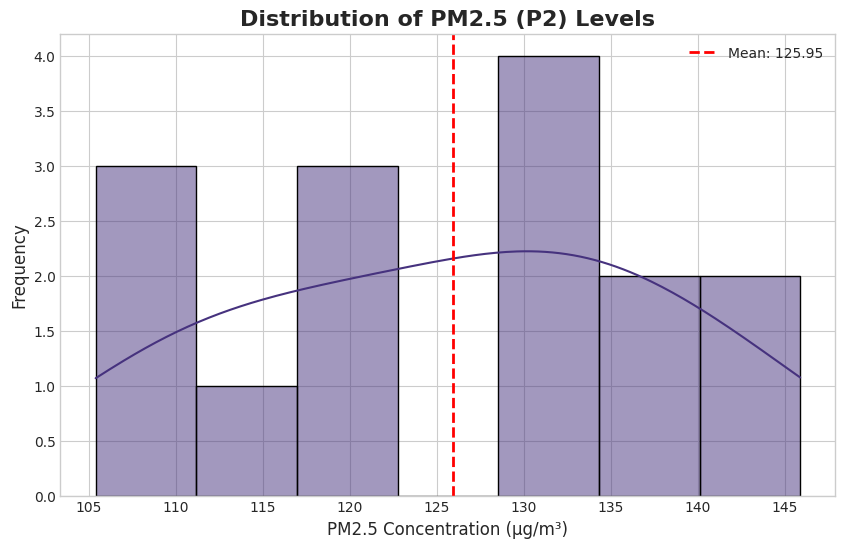

In [4]:
plt.figure(figsize=(10, 6))

sns.histplot(df['P2'], kde=True, bins=7)

# Add a vertical line for the mean to provide context
mean_p2 = df['P2'].mean()
plt.axvline(mean_p2, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_p2:.2f}')

# Formatting the plot
plt.title('Distribution of PM2.5 (P2) Levels', fontsize=16, weight='bold')
plt.xlabel('PM2.5 Concentration (μg/m³)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()


<h3 style="color: #4CAF50;">2.3. Relationships: Do different metrics move together?</h3>
Scatter plots are ideal for visualizing the relationship between two numerical variables. Here, we investigate if higher temperatures are associated with higher PM2.5 levels.
We can also use a heatmap to visualize the correlation between all numerical variables at once.

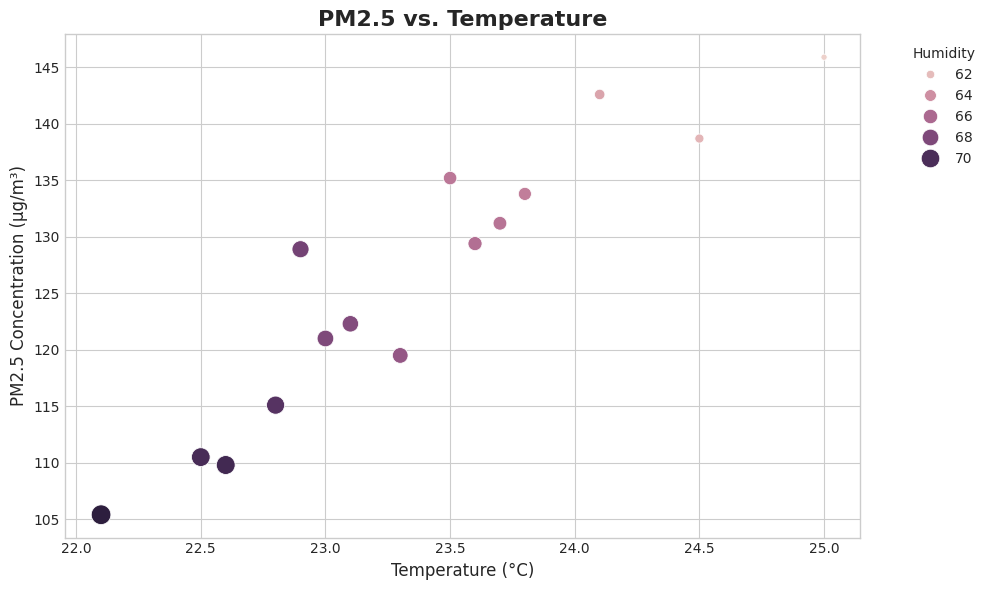

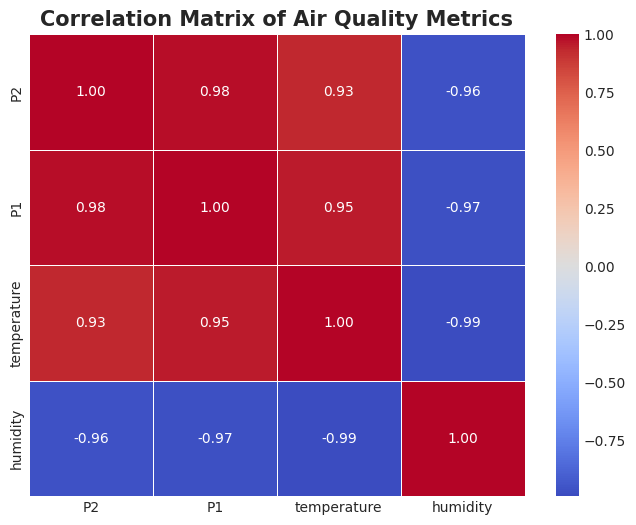

In [5]:
# Scatter Plot: PM2.5 vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='P2', hue='humidity', size='humidity', sizes=(20, 200))

plt.title('PM2.5 vs. Temperature', fontsize=16, weight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('PM2.5 Concentration (μg/m³)', fontsize=12)
plt.legend(title='Humidity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['P2', 'P1', 'temperature', 'humidity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix of Air Quality Metrics', fontsize=15, weight='bold')
plt.show()

<h3 style="color: #4CAF50;">2.4. Categories: Does air quality differ by day of the week?</h3>
Box plots are excellent for comparing the distribution of a numerical variable across different categories. They show the median, quartiles, and potential outliers, giving a comprehensive view of the data for each category.

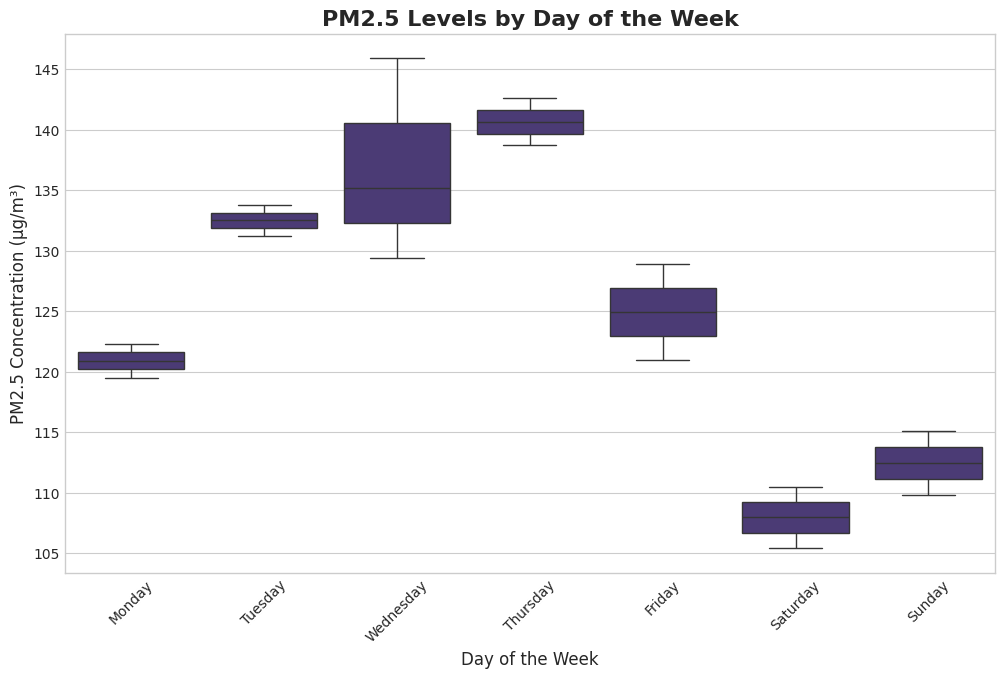

In [6]:
plt.figure(figsize=(12, 7))

# Order the days of the week for a logical plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=df, x='day_of_week', y='P2', order=day_order)

plt.title('PM2.5 Levels by Day of the Week', fontsize=16, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('PM2.5 Concentration (μg/m³)', fontsize=12)
plt.xticks(rotation=45)

plt.show()


<h3 style="color: #4CAF50;">2.5. Interactivity: How can we explore the data dynamically?</h3>
For modern dashboards and web-based reports, interactive plots are essential. Plotly Express makes it easy to create plots that users can zoom, pan, and hover over to get more details. This enhances exploration and engagement.

In [7]:
fig = px.line(
    df,
    y=['P2', 'P1'],
    title='Interactive Daily Air Quality Trends',
    labels={'timestamp': 'Date', 'value': 'Pollutant Concentration (μg/m³)'},
    template='plotly_white'
)

# Update layout for better readability
fig.update_layout(
    title_x=0.5,
    legend_title_text='Pollutant',
    font=dict(family="Segoe UI, Helvetica, Arial, sans-serif")
)

fig.show()

<h2 style="color: #4CAF50; border-bottom: 2px solid #ccc; padding-bottom: 8px;">3. Summary and Insights</h2>

<div style="background-color: #e8f5e9; color: #34495e; border-left: 5px solid #66bb6a; padding: 15px; border-radius: 5px; margin-top: 15px; width: 95%;">
  <h3 style="color: #2c3e50; margin-top: 0;">Insights from Visualizations:</h3>
  <ul style="padding-left: 20px;">
    <li><strong>Temporal Pattern:</strong> The time series plot reveals a cyclical pattern in particulate matter levels, with peaks occurring roughly every 7 days, suggesting a weekly cycle (perhaps related to traffic or industrial activity).</li>
    <li><strong>Strong Correlation:</strong> The scatter plot and heatmap show a very strong positive correlation (0.98) between PM2.5 (P2) and PM10 (P1), confirming they likely share common emission sources.</li>
    <li><strong>Weather Influence:</strong> PM2.5 levels show a strong positive correlation with temperature and a strong negative correlation with humidity. This suggests that hotter, drier days tend to have worse air quality in this dataset.</li>
    <li><strong>Weekly Variation:</strong> The box plot indicates that the highest pollution levels tend to occur midweek (Wednesday/Thursday), with lower levels over the weekend, reinforcing the theory of a traffic- or work-related weekly cycle.</li>
    <li><strong>Interactive Exploration:</strong> The Plotly chart allows a user to hover over any point to get precise readings for a specific day, making detailed data exploration much more intuitive.</li>
  </ul>
</div>

<p style="margin-top: 20px;">
  This notebook demonstrates how different visualization techniques can be used to extract a rich narrative from a simple dataset. By moving from high-level trends to specific relationships and distributions, we have built a comprehensive understanding of the air quality patterns within our sample data.
</p>